# Evaluación de un modelo de K-Nearest Neighbors

En este proyecto se utiliza el modelo de K-Nearest Neighbors (K-Vecinos más cercanos) y se aplica a un dataset llamado "Glass UCI". Se trata de determinar qué tan bueno o malo resulta ser el modelo cuando se utiliza para realizar una regresión logística y una regresión lineal.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Leemos el archivo
glass = pd.read_csv("C:\\Users\\Luis Carlos\\Documents\\CSVs\\glass.csv")

In [3]:
# Visualizamos la tabla
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Este es un conjunto de datos de identificación de vidrio de UCI. Contiene 10 atributos. Se observa que es una tabla con 214 filas y 10 columnas.

La columnas se describen a continuación.
1. RI: Índice de refracción
2. Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente; de igual forma son los atributos 3 a 9)
3. Mg: Magnesio
4. Al: Aluminio
5. Si: Silicio
6. K: Potasio
7. Ca: Calcio
8. Ba: Bario
9. Fe: Hierro

Los tipos de vidrio son:
1.- Ventana de edificio procesada flotante
2.- Ventana de edificio no procesada flotante
3.- Ventana de vehículo procesada flotante
4.- Ventanas de vehículos no procesadas flotante (ninguna en esta base de datos)
5.- Contenedores
6.- Vajillas
7.- Faros

Nota: El estudio de clasificación de tipos de vidrio fue motivado por investigación criminológica. En la escena del crimen, el tipo de vidrio se puede utilizar como evidencia... ¡si se identifica correctamente!

### KNN para problema de clasificación

Para nuestro problema de clasificación se utilizará la columna 'Type' como variable objetivo, es decir, la que intentaremos predecir. Esta columna se refiere al tipo de vidrio, la cual puede contener 1 de entre 7 valores discretos.

In [4]:
# Observamos cómo están distribuidos los datos de la variable objetivo
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

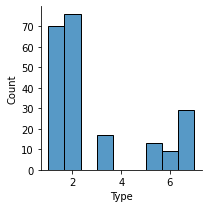

In [5]:
# Visualizamos gráficamente esta proporción
import seaborn as sns
sns.displot(glass['Type'], height=3)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [7]:
# Definimos las columnas que serán las variables independientes y la variable objetivo
from sklearn.metrics import f1_score

variable_objetivo_clasificacion = "Type"
variables_independientes_clasificacion = glass.drop(
    variable_objetivo_clasificacion, axis=1).columns

In [8]:
# Dividimos la tabla en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    glass[variables_independientes_clasificacion],
    glass[variable_objetivo_clasificacion], test_size=0.20, random_state=2021)

In [9]:
# Nos damos una idea de aproximadamente cuántos k-vecinos podríamos elegir
k_categorias = len(y_train.unique())
k_categorias

6

In [10]:
# Intentamos para k_vecinos igual a 6
clasificador_knn = KNeighborsClassifier(n_neighbors=6, 
                                        weights="uniform")
clasificador_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [11]:
preds = clasificador_knn.predict(X_test)
f1_score(y_test, preds, average="micro")

0.5581395348837209

En este último paso, average = "micro" se utiliza para cuando tienes distribuciones desbalanceadas en tu variable objetivo. Si hubiésemos tenido más o menos la misma proporción de tipos de vidrio entonces hubiese sido mejor utilizar average = "macro".

In [12]:
# Observamos los primeros 50 vecinos cambiando el parámetro weights

for k in range(1,51,2):
    clasificador_knn_unif = KNeighborsClassifier(n_neighbors=k, 
                                        weights="uniform")
    clasificador_knn_unif.fit(X_train, y_train)
    preds_unif = clasificador_knn_unif.predict(X_test)
    clasificador_knn_distance = KNeighborsClassifier(n_neighbors=k, 
                                        weights="distance")
    clasificador_knn_distance.fit(X_train, y_train)
    preds_distance = clasificador_knn_distance.predict(X_test)
    print(f'{(k,f1_score(y_test, preds_unif, average="micro"),f1_score(y_test, preds_distance, average="micro"))}')

(1, 0.6976744186046512, 0.6976744186046512)
(3, 0.6976744186046512, 0.6744186046511628)
(5, 0.5813953488372093, 0.6046511627906976)
(7, 0.5813953488372093, 0.6046511627906976)
(9, 0.5581395348837209, 0.5581395348837209)
(11, 0.5581395348837209, 0.5813953488372093)
(13, 0.5813953488372093, 0.6046511627906976)
(15, 0.5581395348837209, 0.6046511627906976)
(17, 0.5581395348837209, 0.6046511627906976)
(19, 0.5813953488372093, 0.627906976744186)
(21, 0.5581395348837209, 0.6046511627906976)
(23, 0.5813953488372093, 0.6046511627906976)
(25, 0.5813953488372093, 0.627906976744186)
(27, 0.5581395348837209, 0.5813953488372093)
(29, 0.5348837209302325, 0.5813953488372093)
(31, 0.5348837209302325, 0.5813953488372093)
(33, 0.5116279069767442, 0.5813953488372093)
(35, 0.5348837209302325, 0.5813953488372093)
(37, 0.5348837209302325, 0.5813953488372093)
(39, 0.5348837209302325, 0.5813953488372093)
(41, 0.5348837209302325, 0.5813953488372093)
(43, 0.5348837209302325, 0.5813953488372093)
(45, 0.5116279069

La razón por la cual se hace esto es para observar qué número de k-vecinos es mejor para utilizar, ya que no hay manera de saberlo más que a prueba y error. En este caso, los k-vecinos k = 1 y k = 3 fueron los que arrojaron mejores resultados. Utilizaremos el k = 3 con parámetro weight = "uniform".

In [13]:
# Creamos el modelo, lo ajustamos y evaluamos
clasificador_knn = KNeighborsClassifier(n_neighbors=3, 
                                        weights="uniform")

clasificador_knn.fit(X_train, y_train)

preds = clasificador_knn.predict(X_test)
f1_score(y_test, preds, average="micro")

0.6976744186046512

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
# Realizamos la validación cruzada

error_validacion_cruzada_clasificacion = np.sqrt(np.abs(
    cross_val_score(KNeighborsClassifier(n_neighbors=3,
                                         weights="uniform"), 
                X=glass[variables_independientes_clasificacion],
               y=glass[variable_objetivo_clasificacion], 
               scoring="f1_micro",
                    cv = 10
        ).mean()
      )
)
print("La puntuación F1 de KNN para clasificacion en este dataset es {:.2f}".format(
    error_validacion_cruzada_clasificacion))

La puntuación F1 de KNN para clasificacion en este dataset es 0.81


c:\users\luis carlos\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


¡Vaya sorpresa! Tuvimos una buena clasificación, esto debido a que nuestra tabla está constituida únicamente por columnas numéricas. Cuando tenemos también columnas categóricas, el modelo KNN comienza a presentar dificultades.

### KNN para problema de regresión

En este caso intentaremos predecir el valor de "RI" con una regresión lineal en función de las demás variables.

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

variable_objetivo_regresion = "RI"
variables_independientes_regresion = glass.drop(
    variable_objetivo_regresion, axis=1).columns

In [17]:
# Partimos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    glass[variables_independientes_regresion],
    glass[variable_objetivo_regresion], test_size=0.20)

Ahora utilizaremos k = 3 y el parámetro weights = "distance"

In [18]:
# Creamos el modelo y lo ajustamos
regresor_knn = KNeighborsRegressor(n_neighbors=3, weights="distance")

regresor_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [19]:
# Observamos la predicciones
preds = regresor_knn.predict(X_test)
preds

array([1.51973184, 1.51626761, 1.51745755, 1.51638903, 1.52161993,
       1.52061831, 1.51952769, 1.5169058 , 1.51792343, 1.51908548,
       1.51688975, 1.51699473, 1.51666197, 1.51351052, 1.52127496,
       1.51543145, 1.51696838, 1.51760143, 1.51827501, 1.51826507,
       1.51884171, 1.51649907, 1.51777938, 1.51638548, 1.519022  ,
       1.51745865, 1.51753794, 1.52712741, 1.52053251, 1.52171833,
       1.51436985, 1.51685823, 1.51755489, 1.51789412, 1.51645417,
       1.52218317, 1.51772548, 1.52334882, 1.51717404, 1.51761728,
       1.5166268 , 1.51984662, 1.51908923])

In [20]:
np.sqrt(np.abs(mean_squared_error(y_test, preds)))

0.0017859042383764462

El modelo resultó extremadamente preciso, ya que el valor de la raíz del error cuadrático medio fue demasiado cercana a 0. Es importante tomar en cuenta que el error fue tan pequeño debido a que todos los valores de "RI" son muy parecidos.